## Exploring Train / Test Data

In [2]:
## -- 필요한 패키지 및 모듈 로드 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import google.datalab.storage as storage
import pandas as pd
from io import BytesIO
from google.datalab import Context

In [18]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # 한 셀(cell)에서의 코드 실행 결과가 다 보이도록 설정

In [4]:
## -- events, train, test 데이터 로드

my_bucket = storage.Bucket('cap-18/data')

clicks_test = my_bucket.object('clicks_test.csv')
uri1 = clicks_test.uri
%gcs read --object $uri1 --variable c_test

clicks_train = my_bucket.object('clicks_train.csv')
uri2 = clicks_train.uri
%gcs read --object $uri2 --variable c_train

events = my_bucket.object('events.csv')
uri7 = events.uri
%gcs read --object $uri7 --variable c_events

In [11]:
events = pd.read_csv(BytesIO(c_events))
clicks_train = pd.read_csv(BytesIO(c_train))
clicks_test = pd.read_csv(BytesIO(c_test))

In [20]:
events_train_merged = pd.merge(events, clicks_train, on = 'display_id')
events_test_merged = pd.merge(events, clicks_test, on = 'display_id')

In [25]:
# 정상적으로 데이터 합쳐졌는지 여부 확인
events_train_merged.count()

display_id      87141731
uuid            87141731
document_id     87141731
timestamp       87141731
platform        87141731
geo_location    87140469
ad_id           87141731
clicked         87141731
hour            87141731
day             87141731
dtype: int64

In [26]:
events_test_merged.count()

display_id      32225162
uuid            32225162
document_id     32225162
timestamp       32225162
platform        32225162
geo_location    32224655
ad_id           32225162
hour            32225162
day             32225162
dtype: int64

In [21]:
events_train_merged.head(1)
events_test_merged.head(1)

,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id,clicked
0,1,cb8c55702adb93,379743,61,3,US>SC>519,42337,0


,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id
0,16874594,16e1290e312561,1792425,1026,3,US>MI>505,66758


In [22]:
events_train_merged['hour'] = (events_train_merged.timestamp // (3600 * 1000)) % 24
events_train_merged['day'] = events_train_merged.timestamp // (3600 * 24 * 1000)

events_test_merged['hour'] = (events_test_merged.timestamp // (3600 * 1000)) % 24
events_test_merged['day'] = events_test_merged.timestamp // (3600 * 24 * 1000)

In [19]:
events_train_merged.head(10)
events_train_merged.tail(10)

,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id,clicked,hour,day
0,1,cb8c55702adb93,379743,61,3,US>SC>519,42337,0,0,0
1,1,cb8c55702adb93,379743,61,3,US>SC>519,139684,0,0,0
2,1,cb8c55702adb93,379743,61,3,US>SC>519,144739,1,0,0
3,1,cb8c55702adb93,379743,61,3,US>SC>519,156824,0,0,0
4,1,cb8c55702adb93,379743,61,3,US>SC>519,279295,0,0,0
5,1,cb8c55702adb93,379743,61,3,US>SC>519,296965,0,0,0
6,2,79a85fa78311b9,1794259,81,2,US>CA>807,125211,0,0,0
7,2,79a85fa78311b9,1794259,81,2,US>CA>807,156535,0,0,0
8,2,79a85fa78311b9,1794259,81,2,US>CA>807,169564,0,0,0
9,2,79a85fa78311b9,1794259,81,2,US>CA>807,308455,1,0,0


,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id,clicked,hour,day
87141721,16874591,49396799cb3a40,2816969,1123199601,1,US>IN>582,397506,0,23,12
87141722,16874591,49396799cb3a40,2816969,1123199601,1,US>IN>582,483448,0,23,12
87141723,16874592,45f3b28fd8f19d,2823420,1123199635,2,GB,82851,0,23,12
87141724,16874592,45f3b28fd8f19d,2823420,1123199635,2,GB,153244,1,23,12
87141725,16874592,45f3b28fd8f19d,2823420,1123199635,2,GB,167294,0,23,12
87141726,16874592,45f3b28fd8f19d,2823420,1123199635,2,GB,186600,0,23,12
87141727,16874593,21f03d8a66e702,2777166,1123199936,2,US>NJ>501,151498,1,23,12
87141728,16874593,21f03d8a66e702,2777166,1123199936,2,US>NJ>501,282350,0,23,12
87141729,16874593,21f03d8a66e702,2777166,1123199936,2,US>NJ>501,521828,0,23,12
87141730,16874593,21f03d8a66e702,2777166,1123199936,2,US>NJ>501,522693,0,23,12


In [23]:
events_test_merged.head(10)
events_test_merged.tail(10)

,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id,hour,day
0,16874594,16e1290e312561,1792425,1026,3,US>MI>505,66758,0,0
1,16874594,16e1290e312561,1792425,1026,3,US>MI>505,150083,0,0
2,16874594,16e1290e312561,1792425,1026,3,US>MI>505,162754,0,0
3,16874594,16e1290e312561,1792425,1026,3,US>MI>505,170392,0,0
4,16874594,16e1290e312561,1792425,1026,3,US>MI>505,172888,0,0
5,16874594,16e1290e312561,1792425,1026,3,US>MI>505,180797,0,0
6,16874595,1b7e42e26bf9dd,1773803,1094,1,US>IN>602,8846,0,0
7,16874595,1b7e42e26bf9dd,1773803,1094,1,US>IN>602,30609,0,0
8,16874595,1b7e42e26bf9dd,1773803,1094,1,US>IN>602,143982,0,0
9,16874596,7a3dec845b9467,1767007,1546,1,US>CA>803,11430,0,0


,display_id,uuid,document_id,timestamp,platform,geo_location,ad_id,hour,day
32225152,23120124,11f9ac8cee26f2,751048,1295999657,2,US>GA>524,173403,23,14
32225153,23120124,11f9ac8cee26f2,751048,1295999657,2,US>GA>524,489589,23,14
32225154,23120125,6bbdc5756789cc,744496,1295999771,2,US>MI>505,86281,23,14
32225155,23120125,6bbdc5756789cc,744496,1295999771,2,US>MI>505,89725,23,14
32225156,23120125,6bbdc5756789cc,744496,1295999771,2,US>MI>505,187797,23,14
32225157,23120125,6bbdc5756789cc,744496,1295999771,2,US>MI>505,254698,23,14
32225158,23120126,b545c100626cba,2357447,1295999805,2,US>SD>764,57097,23,14
32225159,23120126,b545c100626cba,2357447,1295999805,2,US>SD>764,145293,23,14
32225160,23120126,b545c100626cba,2357447,1295999805,2,US>SD>764,201649,23,14
32225161,23120126,b545c100626cba,2357447,1295999805,2,US>SD>764,292363,23,14


(-0.5, 23.5)

Text(0.5,0,u'Hour of Day')

Text(0,0.5,u'Fraction of Events')

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


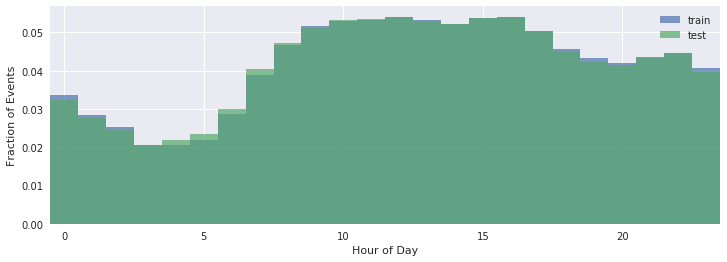

In [24]:
plt.figure(figsize=(12,4))
events_train_merged.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label="train", alpha=0.7, normed=True)
events_test_merged.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label="test", alpha=0.7, normed=True)
plt.xlim(-0.5, 23.5)
plt.legend(loc="best")
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")

(-0.5, 14.5)

Text(0.5,0,u'Days since June 14')

Text(0,0.5,u'Fraction of Events')

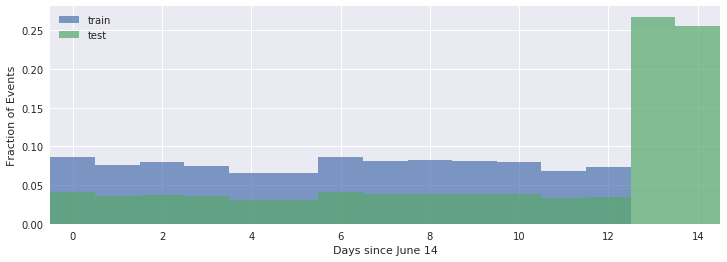

In [27]:
plt.figure(figsize=(12,4))
events_train_merged.day.hist(bins=np.linspace(-.5, 14.5, 16), label="train", alpha=0.7, normed=True)
events_test_merged.day.hist(bins=np.linspace(-.5, 14.5, 16), label="test", alpha=0.7, normed=True)
plt.xlim(-0.5, 14.5)
plt.legend(loc="best")
plt.xlabel("Days since June 14")
plt.ylabel("Fraction of Events")